In [55]:
#install.packages(c("FactoMineR", "factoextra"))
library("FactoMineR")
library("factoextra")
library(readxl)
library(dplyr)
library(psych)
#install.packages("GPArotation")
library(GPArotation)
#install.packages("psy")
library(psy)
#install.packages("nFactors")
library(nFactors)

In [93]:
df.wa <- read_excel("../../results/df-water-access.xlsx",sheet=1)
summary(df.wa)
colnames(df.wa)
str(df.wa)
head(df.wa, 7)

   Country               ptap             bore             pspr       
 Length:78          Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 Class :character   1st Qu.: 2.775   1st Qu.: 0.225   1st Qu.: 0.000  
 Mode  :character   Median :10.300   Median : 3.900   Median : 0.550  
                    Mean   :11.755   Mean   :12.571   Mean   : 3.128  
                    3rd Qu.:17.675   3rd Qu.:19.925   3rd Qu.: 3.675  
                    Max.   :57.700   Max.   :86.400   Max.   :47.900  
      uspr             pwel             uwel             surw       
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.: 0.525   1st Qu.: 0.425   1st Qu.: 1.200  
 Median : 1.050   Median : 3.950   Median : 3.750   Median : 4.100  
 Mean   : 3.640   Mean   : 6.314   Mean   : 6.821   Mean   : 5.124  
 3rd Qu.: 2.775   3rd Qu.: 8.825   3rd Qu.:10.425   3rd Qu.: 7.525  
 Max.   :36.300   Max.   :48.100   Max.   :33.000   Max.   :19.200  
      tles          

[1] "Country" "ptap"    "bore"    "pspr"    "uspr"    "pwel"    "uwel"   
 [8] "surw"    "tles"    "tmor"    "rain"    "phom"    "imws"    "pipy"   
[15] "truc"    "cart"    "bott"    "uiws"    "othw"    "iwsp"    "basw"   
[22] "liws"    "watp"

tibble [78 x 23] (S3: tbl_df/tbl/data.frame)
 $ Country: chr [1:78] "Afghanistan" "Albania" "Angola" "Armenia" ...
 $ ptap   : num [1:78] 14.2 2.4 10.3 0.5 3.5 2.7 13 5.3 0 18.4 ...
 $ bore   : num [1:78] 20.1 1.4 1.9 0.2 9.3 86.4 28.9 0 0 40.6 ...
 $ pspr   : num [1:78] 4.7 2.5 3.3 1 7.5 0 0.3 0 0 0.2 ...
 $ uspr   : num [1:78] 8.6 0.8 4.8 0.1 1.1 0.3 1.2 0 0 1.5 ...
 $ pwel   : num [1:78] 18.5 4.1 9.1 0.2 6.2 0.2 4.4 1.7 0 9 ...
 $ uwel   : num [1:78] 11.1 0.8 8.3 0 0.2 0.6 20.8 6.2 0 16.3 ...
 $ surw   : num [1:78] 7.3 0 18 0 7 1.2 5.8 5.2 0 0.8 ...
 $ tles   : num [1:78] 45.2 20.6 46.1 1.6 18.7 22.7 49.8 11.2 0 49.8 ...
 $ tmor   : num [1:78] 8.2 1.1 15.6 0.1 4.4 1.6 12.1 0.7 0 32.6 ...
 $ rain   : num [1:78] 0.4 0 1.7 0 0 0.4 0.4 0 0 0 ...
 $ phom   : num [1:78] 2.3 48.8 4.3 88.3 34 4.3 5.1 24.6 69.2 2.6 ...
 $ imws   : num [1:78] 71.2 98.4 66.9 99.9 90.6 97.8 71.7 87.3 76 80.9 ...
 $ pipy   : num [1:78] 4.8 5.2 9.7 8 19.7 3.3 4.2 54.1 3.5 9.6 ...
 $ truc   : num [1:78] 1.5 14.1 9

Country,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,...,pipy,truc,cart,bott,uiws,othw,iwsp,basw,liws,watp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,...,4.8,1.5,4.4,0.2,28.7,1.7,35.4,65.3,5.0,45.3
Albania,2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,...,5.2,14.1,0.2,19.6,1.6,0.1,77.0,97.0,0.9,77.9
Angola,10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,...,9.7,9.7,4.3,1.2,33.1,1.8,32.6,57.0,7.5,34.5
Armenia,0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,...,8.0,1.5,0.0,0.0,0.1,0.0,97.6,99.1,0.1,97.6
Azerbaijan,3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,...,19.7,9.5,0.7,0.1,9.4,1.1,71.2,86.4,3.4,75.9
Bangladesh,2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,...,3.3,0.0,0.1,0.3,2.2,0.1,75.1,96.4,1.3,75.5
Benin,13.0,28.9,0.3,1.2,4.4,20.8,5.8,49.8,12.1,...,4.2,0.2,0.3,0.0,28.3,0.4,29.6,64.0,7.3,37.4


The goal of this study is to analyze the characteristics of the water accessibility variables.

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.5545745 1.5169601 1.33879378 1.30098955 1.19651265
Proportion of Variance 0.2966296 0.1045985 0.08147131 0.07693517 0.06507466
Cumulative Proportion  0.2966296 0.4012281 0.48269943 0.55963460 0.62470926
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.18120970 1.06219269 1.00724046 0.92978320 0.89052132
Proportion of Variance 0.06342074 0.05128424 0.04611515 0.03929531 0.03604674
Cumulative Proportion  0.68813000 0.73941424 0.78552940 0.82482471 0.86087144
                          Comp.11    Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     0.84536550 0.72437372 0.66273386 0.63266944 0.60076161
Proportion of Variance 0.03248377 0.02385079 0.01996437 0.01819412 0.01640521
Cumulative Proportion  0.89335521 0.91720599 0.93717036 0.95536448 0.97176969
                          Comp.16     Comp.17 


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
ptap  0.180  0.376  0.153  0.255                0.271                      
bore         0.152 -0.557                0.197 -0.229        -0.244 -0.341 
pspr  0.122  0.255  0.269 -0.295 -0.393               -0.224               
uspr  0.209         0.279 -0.363                      -0.207 -0.114        
pwel  0.143 -0.103 -0.344               -0.313  0.306 -0.297  0.109        
uwel  0.208        -0.271  0.161  0.241 -0.175         0.214         0.493 
surw  0.201         0.151 -0.205  0.426        -0.115 -0.166        -0.279 
tles  0.297  0.266                0.214  0.111               -0.177        
tmor  0.295  0.243               -0.111 -0.268         0.245         0.110 
rain        -0.177        -0.316         0.145  0.254  0.648        -0.234 
phom -0.248 -0.129  0.134  0.278 -0.202 -0.137 -0.235 -0.214 -0.177  0.197 
imws -0.258  0.316 -0.198        -0.156         0.168               -0.156 
p

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,...,Comp.13,Comp.14,Comp.15,Comp.16,Comp.17,Comp.18,Comp.19,Comp.20,Comp.21,Comp.22
1.4267305,-0.427672110,-0.495034608,-1.09882686,1.68909918,-1.99223923,1.7370609,-1.257469210,-1.58191505,-0.25893829,...,0.42738106,-0.77303538,0.5209875058,0.84051414,-0.030500665,0.389797932,-0.142486034,0.108249102,-0.015936613,0.059673587
-3.5088718,0.281825887,0.360488977,0.18354132,-0.28098199,-2.69127058,-1.9250677,-0.111949218,1.64296460,-1.28497647,...,-0.07150078,-0.95942893,0.7486569758,-1.08138312,-0.339091311,-0.769539087,0.012326940,0.368079660,-0.102774021,-0.087308692
1.7952348,-0.777975232,1.349849957,-1.02782045,2.81636002,-3.45659405,0.6256211,-0.490166454,-0.38576057,-1.86921290,...,1.00569421,0.41132085,-0.2607123137,-0.12047886,0.198515540,-0.309529189,-0.012813120,-0.058666457,-0.012408917,-0.099896768
-4.4017036,0.114596246,0.361233065,0.93578553,-0.92271609,-0.07041174,-1.5281745,-0.924730657,0.06439318,0.63747045,...,1.11279447,0.15261669,0.1414629011,0.71982499,-0.217540517,-0.260316451,0.023726760,0.018350364,-0.072568470,-0.034146310
-2.0508988,0.505375745,1.099512379,0.47447107,0.59326861,-1.76685274,-0.7870105,-0.502659144,0.50478829,-1.94916149,...,-0.06511625,-0.64043671,-0.5056031965,-0.32521911,0.054374250,-0.258186010,-0.006299988,0.149501060,-0.032281175,-0.016457009
-2.0437455,1.258782018,-3.202158724,-0.41458686,0.23433923,1.70268475,-1.6404682,0.085047522,-1.11494314,-1.64887299,...,-0.05339075,-0.60094710,0.3058909114,0.13183009,0.216469905,1.069193142,0.293682832,0.117493336,-0.005178543,-0.062886518
1.6269557,0.007620627,-1.288206642,0.43572244,0.72578696,0.30895687,-0.5468868,0.635250288,-0.41509784,0.66198355,...,0.35907402,-0.41536367,-0.3131049104,-0.22152592,0.178743121,0.043046343,-0.094165929,-0.237080001,0.062052263,0.017438821
-2.7304022,0.697779447,1.544418465,1.62573738,1.67535249,0.99751229,1.0155379,-0.217329792,1.06840960,-0.20800285,...,-0.55240834,-0.23759644,-0.8445601494,-0.56250885,0.202659700,-0.355349377,0.101203988,-0.044837812,0.030276874,-0.057458560
-0.6394664,-3.661774631,1.167937633,2.04177473,-2.14637789,-0.16696720,0.2071313,-0.213727756,-2.42373008,-0.13860833,...,0.15341873,0.48725515,-0.1545119162,-0.98250713,-0.334655855,0.053830475,0.008181981,-0.066090753,-0.055309582,0.039400137
3.1690100,1.894272646,-1.945531667,1.04653349,-1.22130724,-0.86693715,0.1059415,1.803630766,-0.34750690,0.34354129,...,-0.03562086,1.10215260,-0.0001633723,0.09291906,-0.111973870,-0.152618637,-0.705840386,0.217364102,0.155370773,-0.093167051


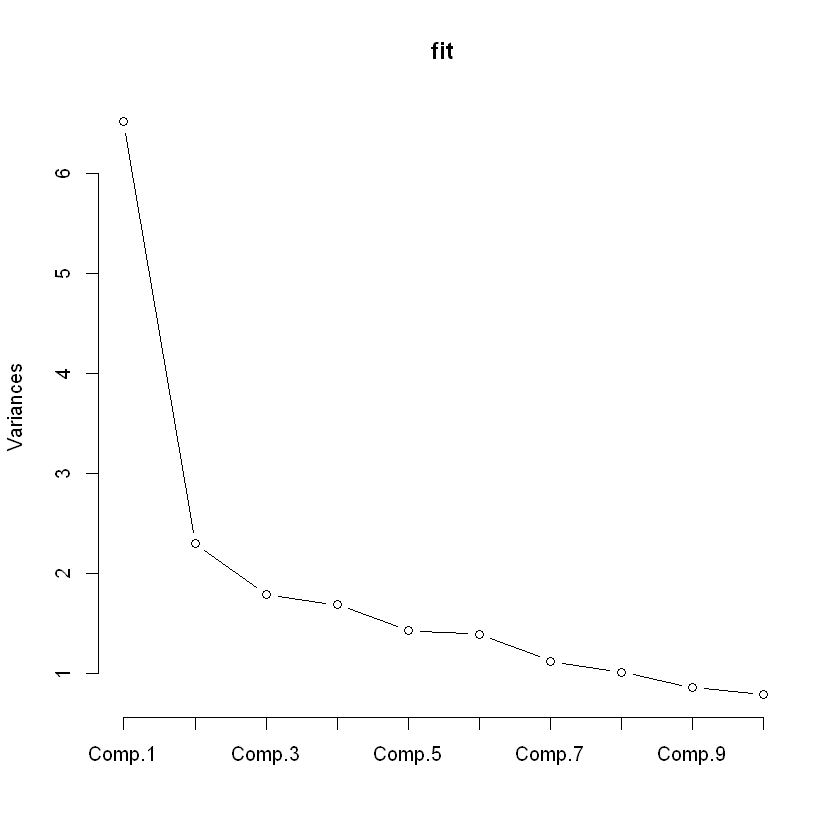

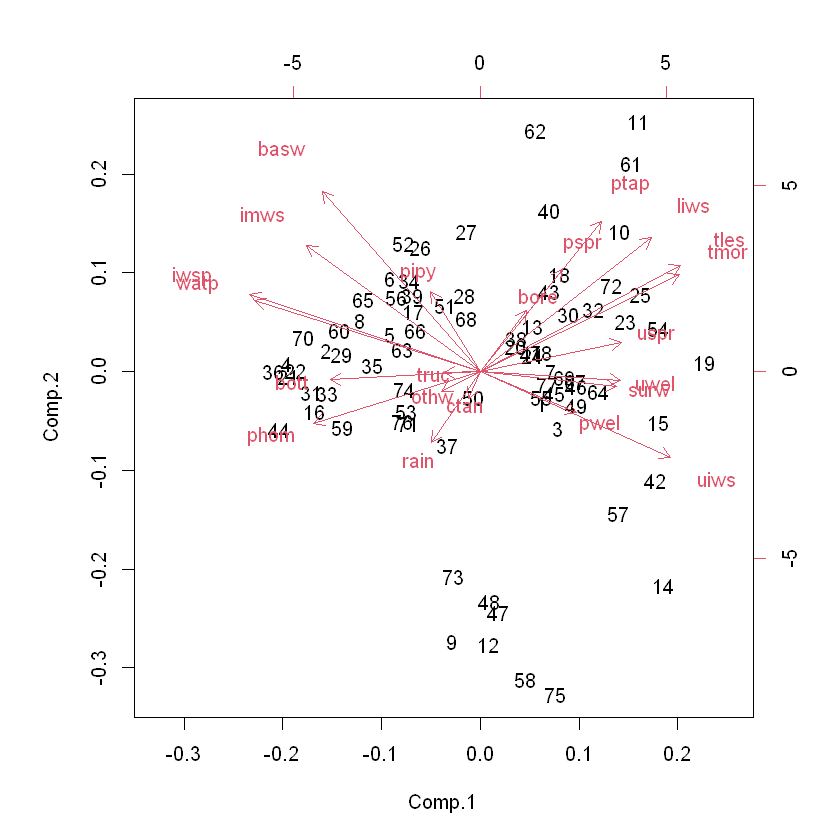

In [3]:
fit <- princomp(df.wa[,c(2:23)], cor=TRUE)
summary(fit) # print variance accounted for
loadings(fit) # pc loadings
plot(fit,type="lines") # scree plot
fit$scores # the principal components
biplot(fit )

In [4]:
# Varimax Rotated Principal Components
# retaining 7 components
fit <- principal(df.wa[,c(2:23)], nfactors=7, rotate="varimax")
fit # print results

Principal Components Analysis
Call: principal(r = df.wa[, c(2:23)], nfactors = 7, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
       RC1   RC5   RC2   RC4   RC3   RC6   RC7   h2    u2 com
ptap -0.11  0.04  0.42  0.39 -0.01  0.67 -0.01 0.78 0.219 2.5
bore  0.06 -0.03 -0.11  0.30 -0.80 -0.12  0.09 0.77 0.228 1.4
pspr -0.02  0.01  0.84 -0.15  0.02  0.01 -0.11 0.75 0.251 1.1
uspr -0.11  0.50  0.62 -0.15 -0.04 -0.05 -0.06 0.68 0.321 2.2
pwel -0.46 -0.13 -0.01  0.22 -0.11 -0.09  0.57 0.62 0.380 2.5
uwel -0.32  0.24 -0.09  0.50 -0.20  0.01  0.36 0.59 0.414 3.6
surw -0.03  0.79  0.10  0.06 -0.07  0.05  0.13 0.66 0.342 1.1
tles -0.13  0.49  0.40  0.40 -0.43  0.26  0.12 0.84 0.156 4.8
tmor -0.25  0.24  0.68  0.49 -0.06 -0.01  0.14 0.84 0.161 2.6
rain -0.02  0.01 -0.03 -0.61 -0.02 -0.03  0.10 0.39 0.612 1.1
phom  0.18 -0.44 -0.32  0.01  0.47 -0.25 -0.38 0.75 0.251 4.7
imws  0.53 -0.71  0.00 -0.03 -0.08  0.10  0.12 0.81 0.188 2.0
pipy  0.20 -0.02 -0.14 

sources: https://www.statmethods.net/advstats/factor.html

# Factor Analysis

sources: http://www.di.fc.ul.pt/~jpn/r/factoranalysis/factoranalysis.html

Factor analysis is a statistical method used to describe variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called factors. […] Factor analysis searches for such joint variations in response to unobserved latent(*) variables.

test of 3 factors

In [ ]:
df.wa <- df.wa[,c(2:23)]

In [17]:
n.factors <- 3 

fit.three <- factanal(df.wa, 
                n.factors,                # number of factors to extract
                scores=c("regression"),
                rotation="none")

print(fit.three, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = df.wa, factors = n.factors, scores = c("regression"),     rotation = "none")

Uniquenesses:
ptap bore pspr uspr pwel uwel surw tles tmor rain phom imws pipy truc ctan bott 
0.63 0.88 0.82 0.79 0.84 0.76 0.71 0.00 0.12 0.92 0.58 0.61 0.94 0.91 0.99 0.70 
uiws othw iwsp basw liws watp 
0.61 0.98 0.00 0.07 0.00 0.02 

Loadings:
     Factor1 Factor2 Factor3
ptap  0.53                  
tles  0.81            0.53  
tmor  0.79    0.40   -0.31  
phom -0.61                  
bott -0.52                  
uiws  0.55                  
iwsp -0.86    0.51          
liws  0.77    0.48   -0.42  
watp -0.85    0.50          
basw -0.49    0.76    0.33  
bore                        
pspr  0.35                  
uspr  0.44                  
pwel  0.34                  
uwel  0.48                  
surw  0.38            0.38  
rain                        
imws -0.48    0.40          
pipy                        
truc                        
ctan                        
othw           

test of 2 factors

In [134]:
n.factors <- 2 

fit.two <- factanal(df.wa, 
                n.factors,                # number of factors to extract
                scores=c("regression"),
                rotation="none")

print(fit.two, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = df.wa, factors = n.factors, scores = c("regression"),     rotation = "none")

Uniquenesses:
ptap bore pspr uspr pwel uwel surw tles tmor rain phom imws pipy truc cart bott 
0.67 0.87 0.91 0.79 0.84 0.78 0.76 0.02 0.59 0.92 0.58 0.64 0.94 0.95 1.00 0.70 
uiws othw iwsp basw liws watp 
0.64 0.98 0.00 0.07 0.66 0.02 

Loadings:
     Factor1 Factor2
tmor -0.53    0.36  
imws  0.60          
bott  0.53          
uiws -0.58          
iwsp  1.00          
basw  0.81    0.53  
watp  0.99          
tles -0.57    0.81  
ptap -0.33    0.47  
bore          0.32  
pspr                
uspr -0.35          
pwel -0.40          
uwel -0.40          
surw -0.34    0.36  
rain                
phom  0.49   -0.42  
pipy                
truc                
cart                
othw                
liws -0.47    0.35  

               Factor1 Factor2
SS loadings       5.52    2.15
Proportion Var    0.25    0.10
Cumulative Var    0.25    0.35

Test of the hypothesis that 2 factors are su

In [19]:
head(fit.two$scores , 7)

Factor1,Factor2
-0.3028410,0.46439023
1.0588278,0.04677141
-0.4561554,0.37831403
1.7436868,-0.49476248
0.8877984,-0.11911901
0.9741913,0.21974414
-0.5090083,0.57339573


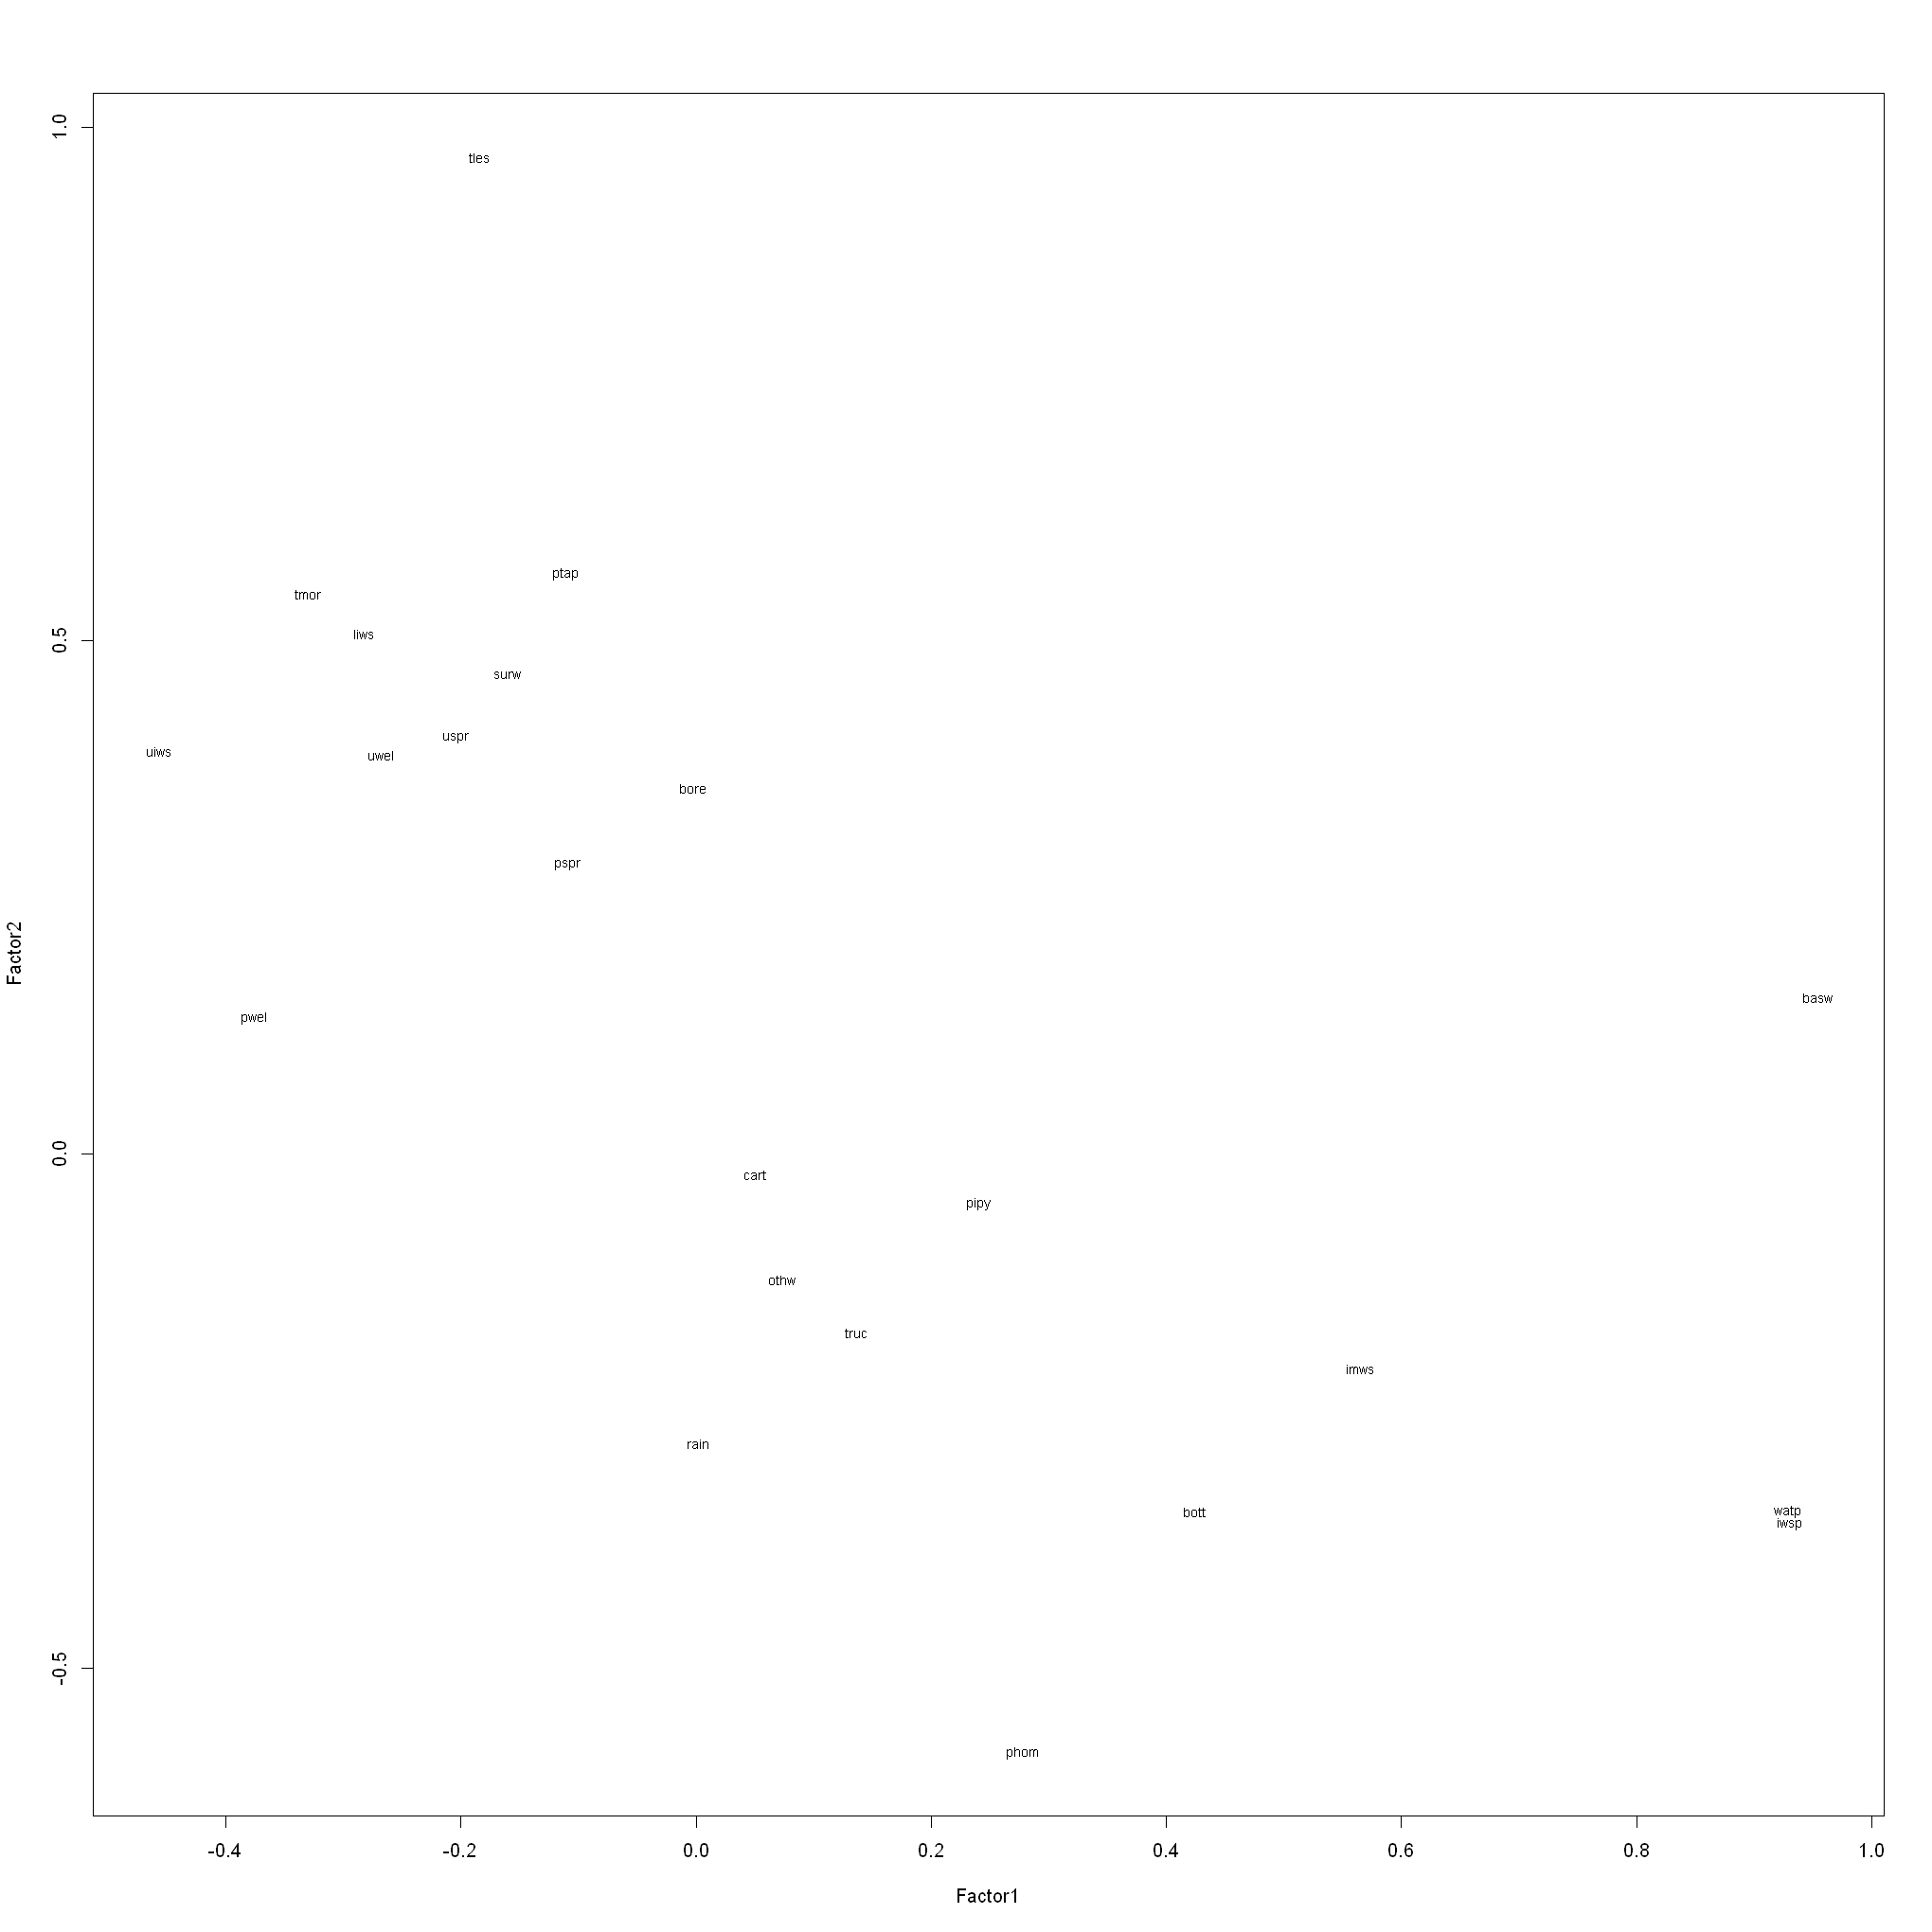

In [140]:
# plot factor 1 by factor 2 
load <- fit$loadings[,1:2] 
plot(load,type="n") # set up plot 
text(load,labels=names(df.wa),cex=.7) # add variable names

The output maximizes variance for the 1st and subsequent factors, while all are orthogonal to each other.

Rotation serves to make the output more understandable, by seeking so-called “Simple Structure”: A pattern of loadings where items load most strongly on one factor, and much more weakly on the other factors. Eg, varimax rotation is an orthogonal rotation of the factor axes to maximize the variance of the squared loadings of a factor (column) on all the variables (rows) in a factor matrix, which has the effect of differentiating the original variables by extracted factor. 

In [135]:
fit <- factanal(df.wa, 
                n.factors,              # number of factors to extract
                rotation="varimax")     # 'varimax' is an ortho rotation

load <- fit$loadings[,1:2] 
head(load , 7)

,Factor1,Factor2
ptap,-0.111134968,0.5654447
bore,-0.002119038,0.3569892
pspr,-0.109410342,0.2822579
uspr,-0.204085365,0.4063478
pwel,-0.375898200,0.1331218
uwel,-0.268117985,0.3890323
surw,-0.160084712,0.4671127


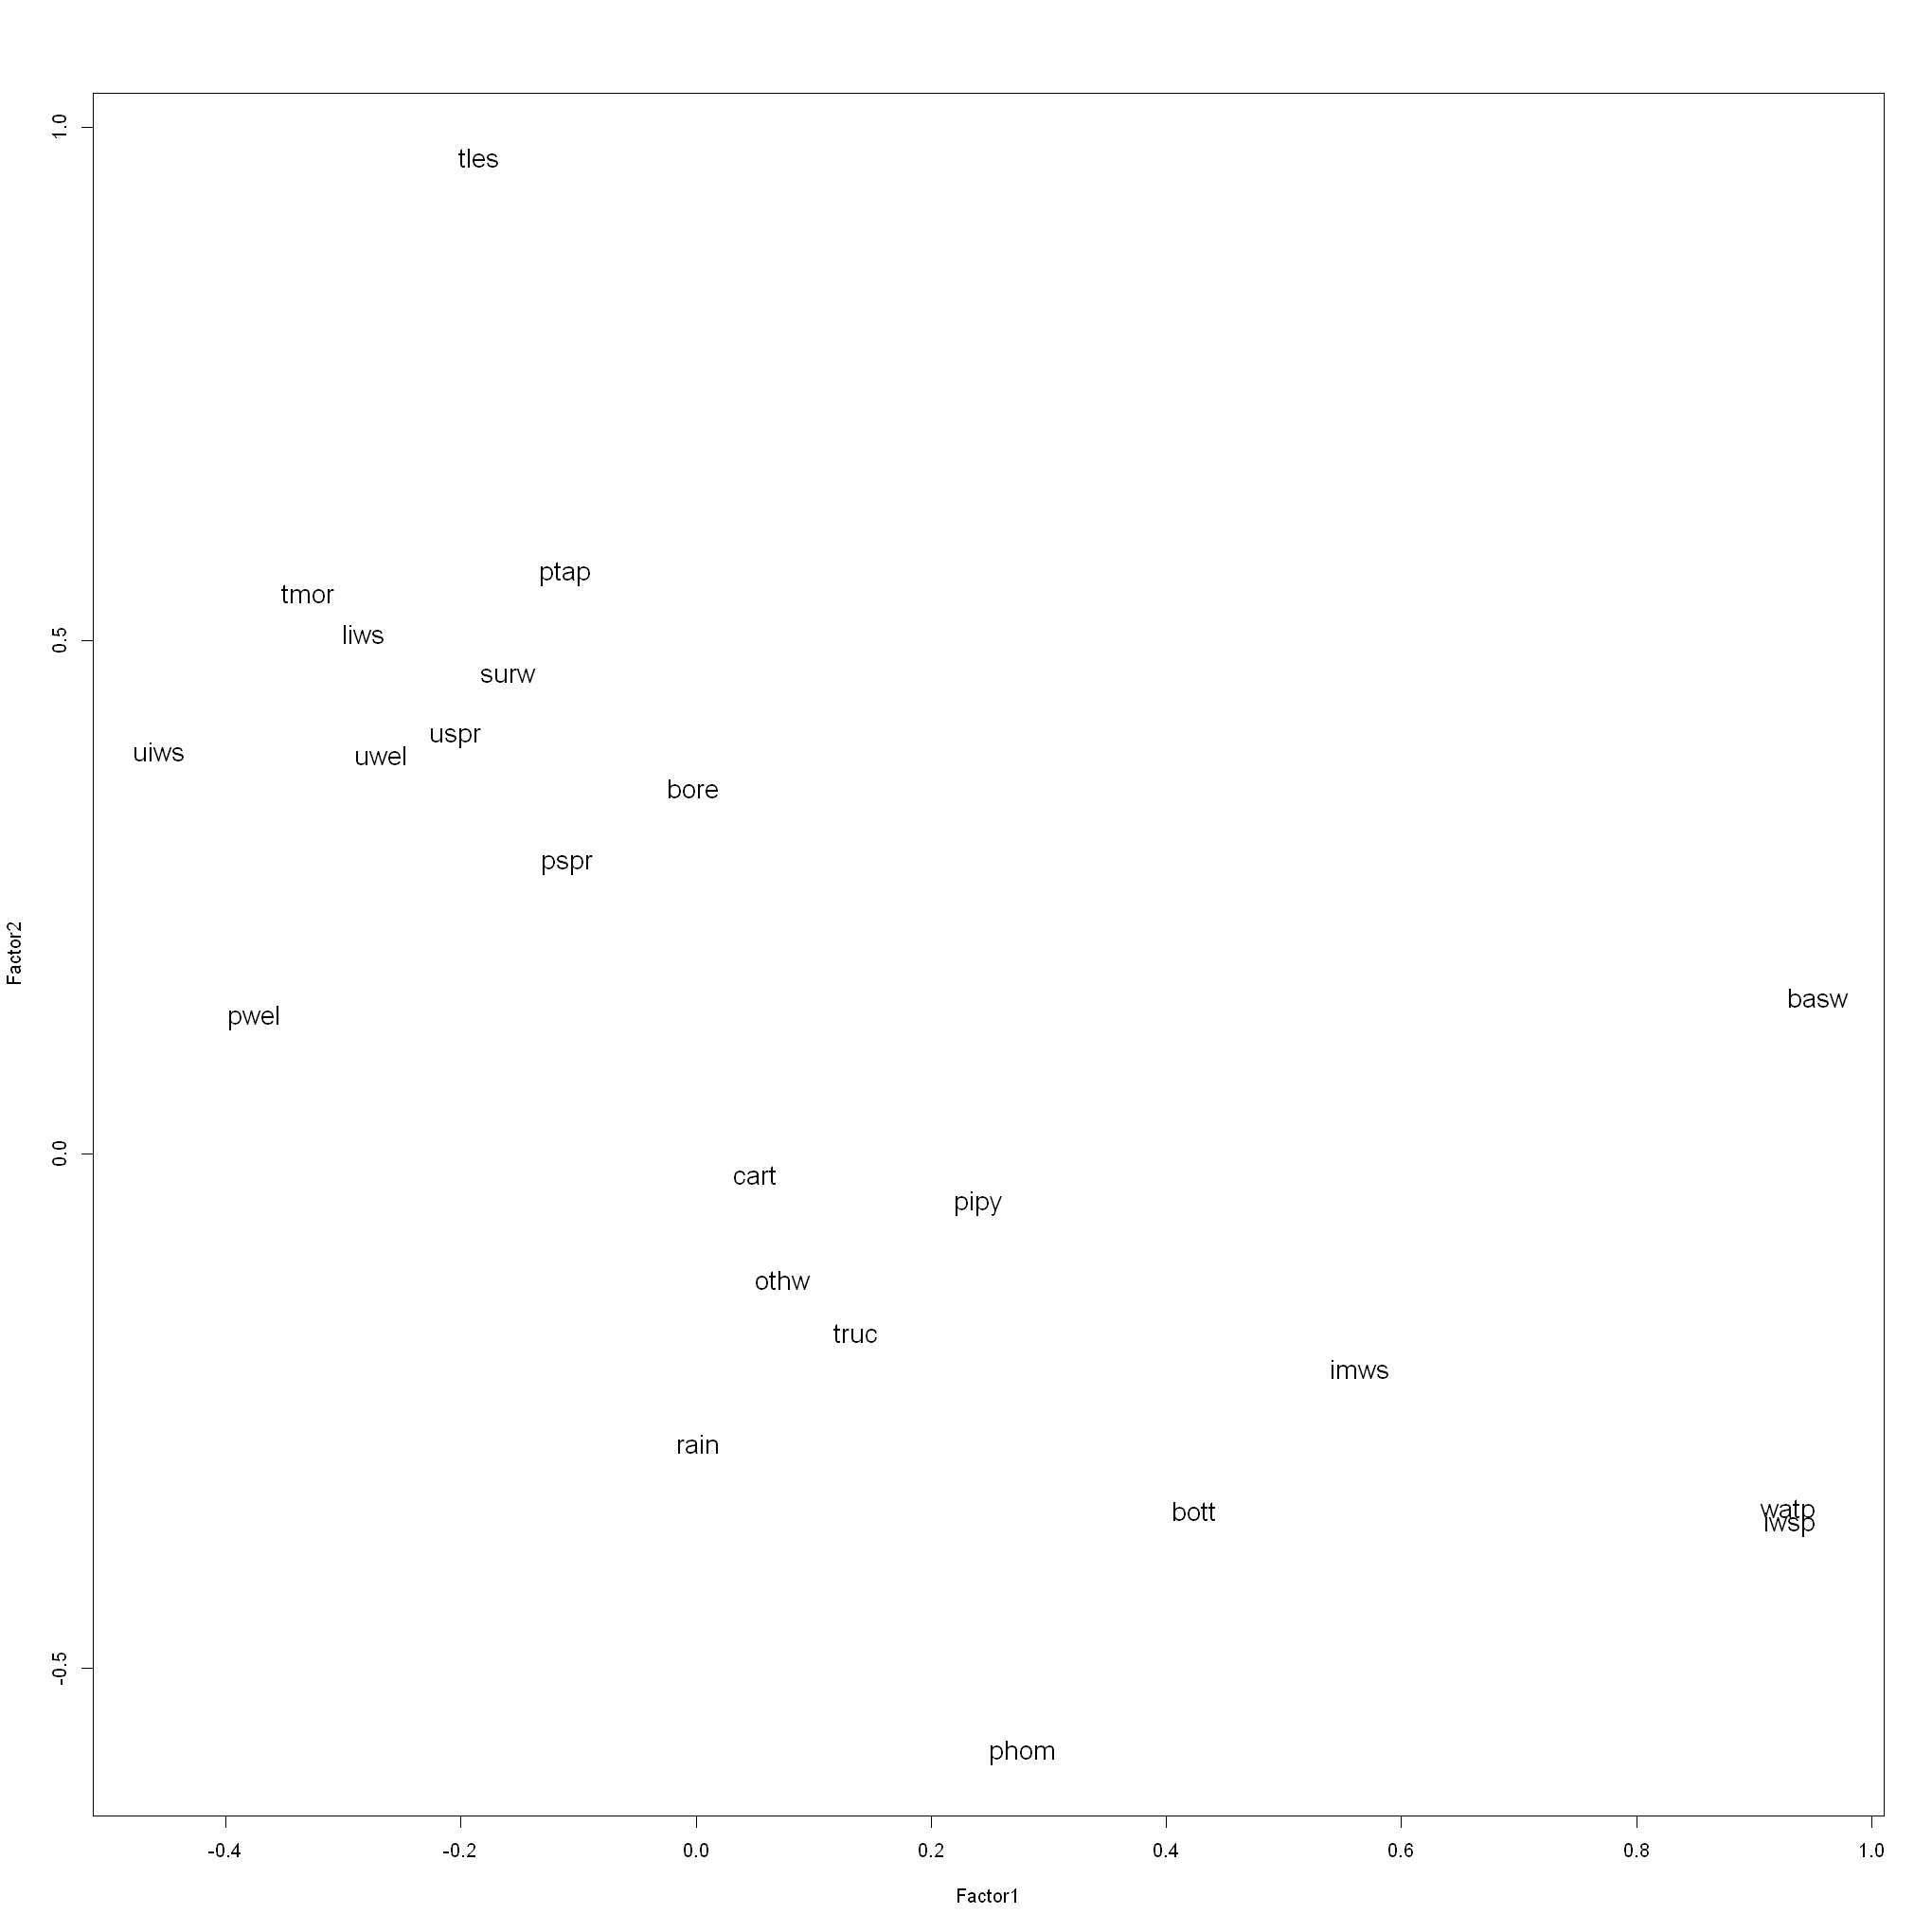

In [150]:
plot(load,type="n") # set up plot 
text(load,labels=names(df.wa),cex=1.4) # add variable names

Looking at both plots we see that iwsp, watp all have high factor loadings around 0.9 on the first factor (PA1) while tles, tmor, uiws load highly on the second factor (PA2). We could rename PA1 as prem, and PA2 as dist.

In [147]:
solution <- fa(r = cor(df.wa), nfactors = 2, rotate = "oblimin", fm = "pa")

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."


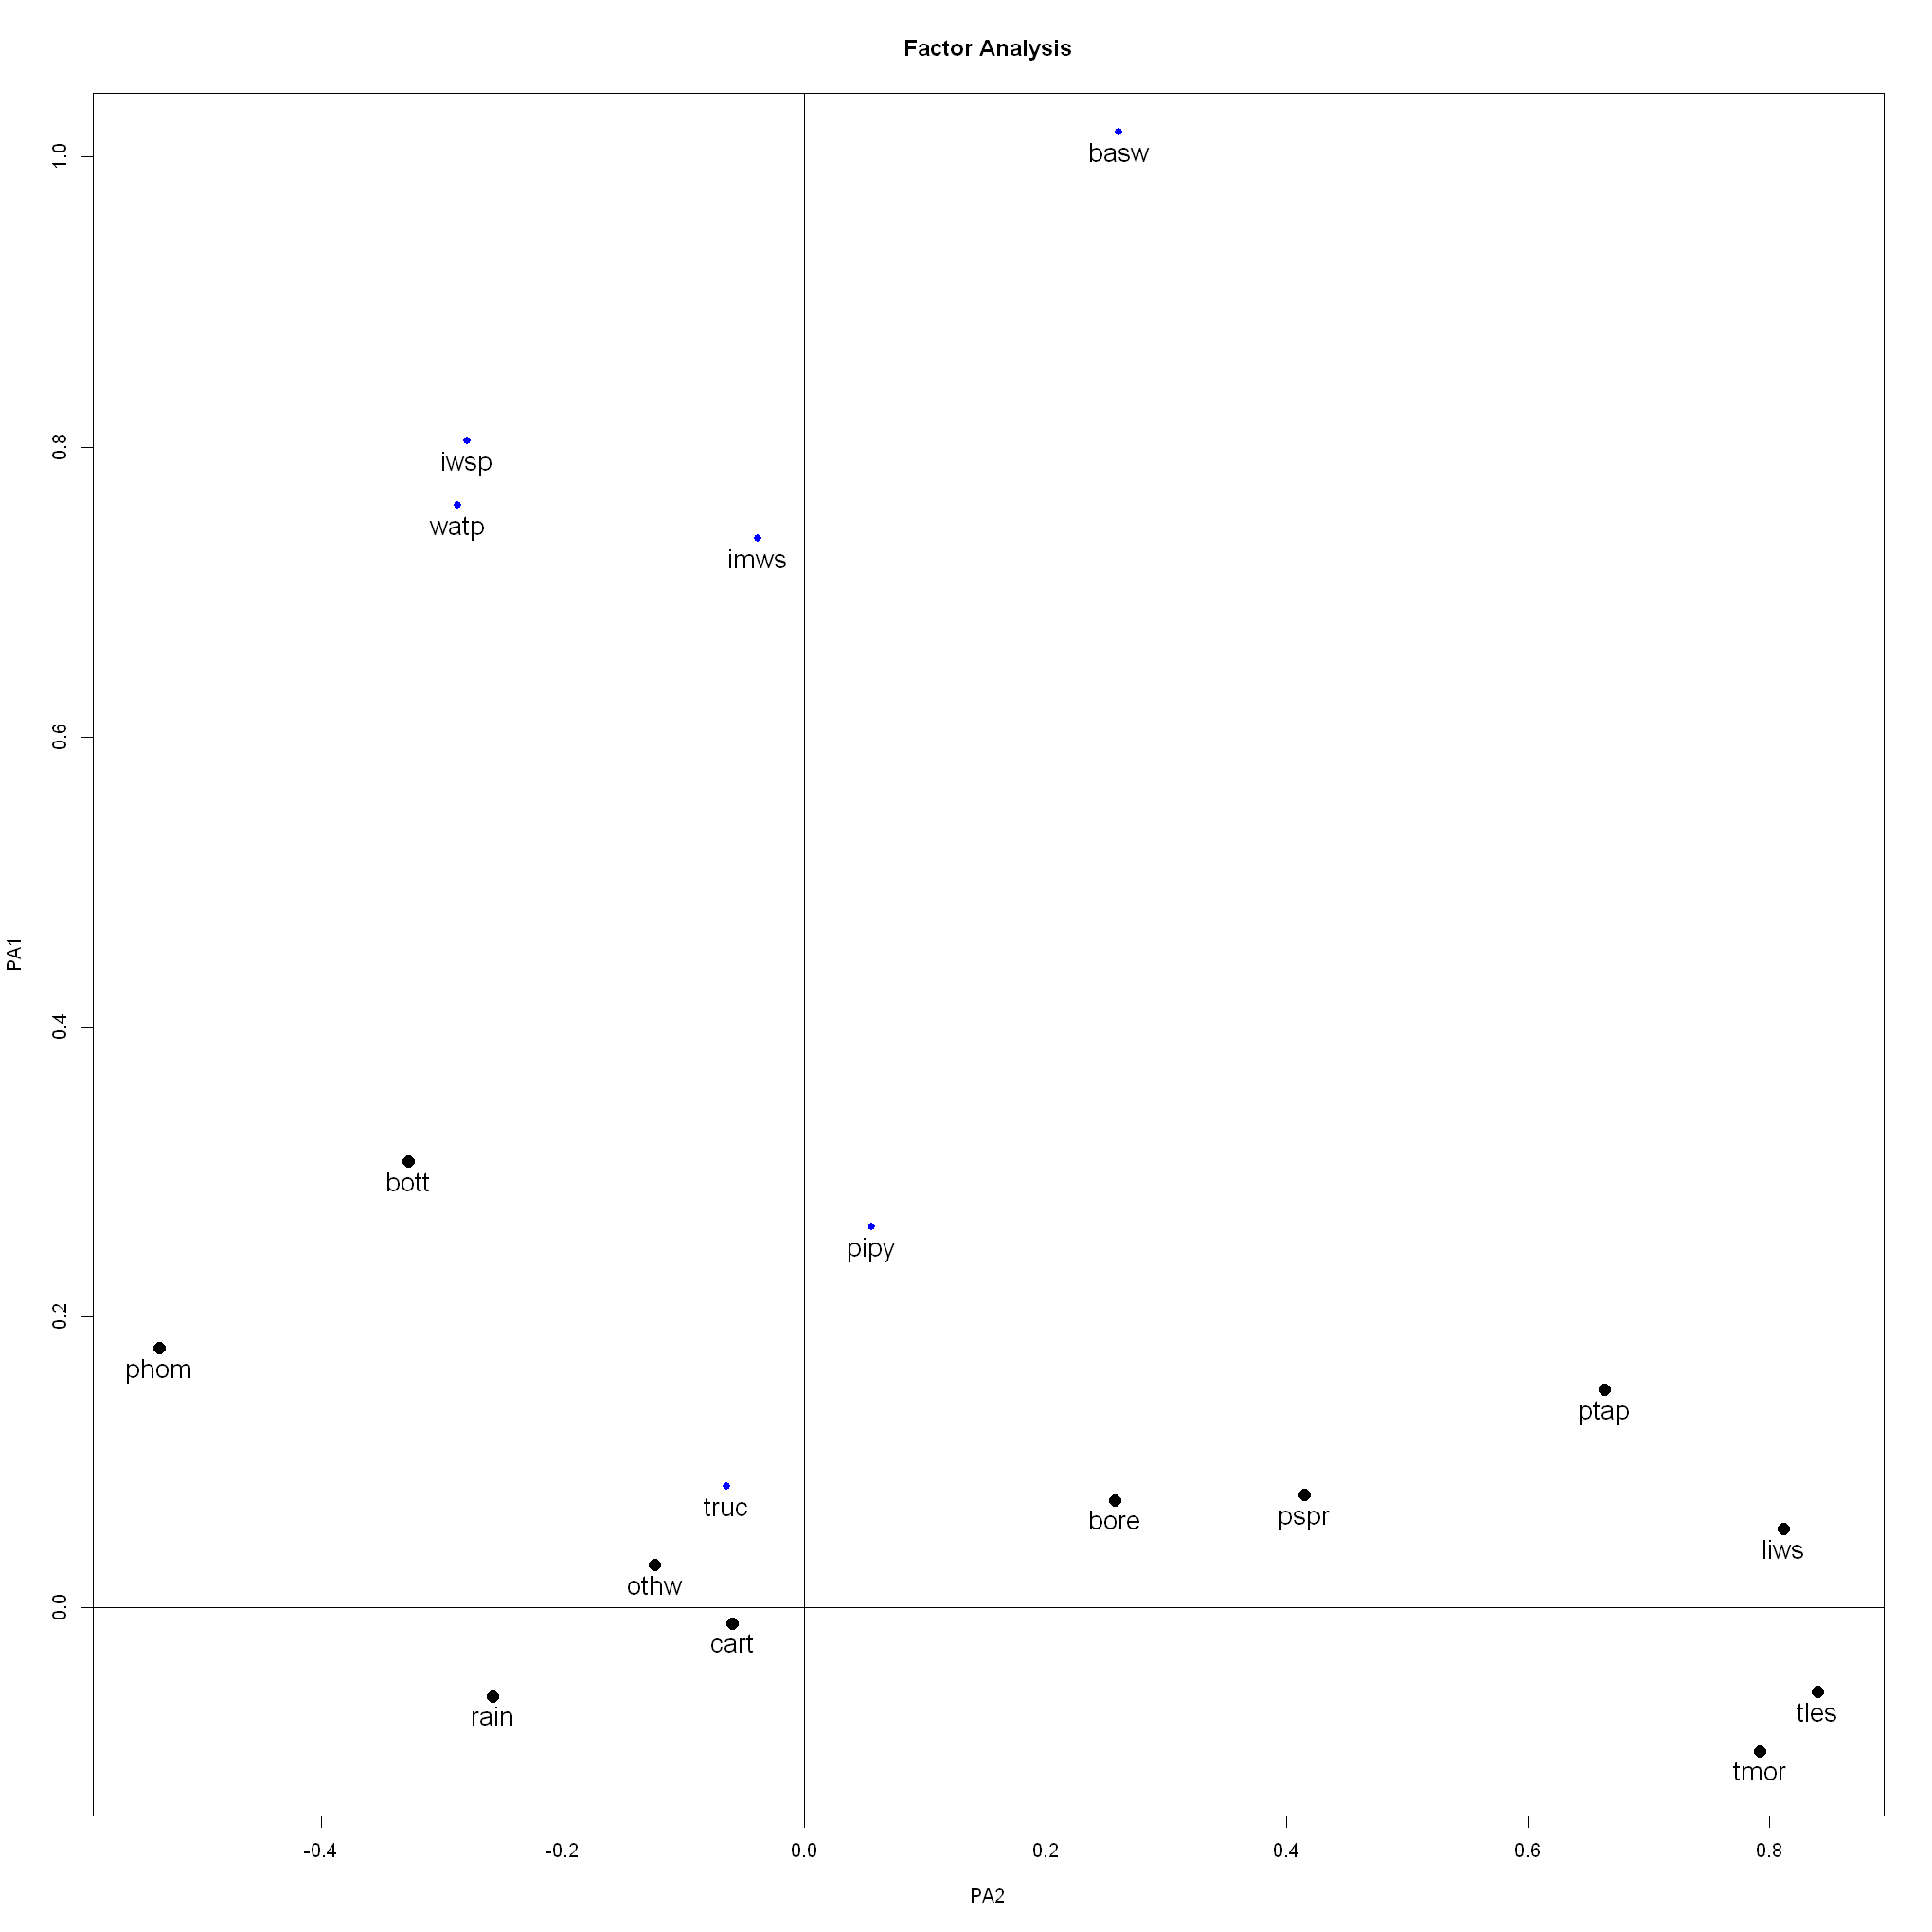

In [148]:
plot(solution,labels=names(df.wa),cex=1.4, ylim=c(-.1,1)) 

In [149]:
solution

Factor Analysis using method =  pa
Call: fa(r = cor(df.wa), nfactors = 2, rotate = "oblimin", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
       PA2   PA1     h2    u2 com
ptap  0.66  0.15 0.3895 0.611 1.1
bore  0.26  0.07 0.0577 0.942 1.2
pspr  0.41  0.08 0.1541 0.846 1.1
uspr  0.39 -0.19 0.2482 0.752 1.5
pwel  0.12 -0.28 0.1168 0.883 1.3
uwel  0.31 -0.27 0.2360 0.764 2.0
surw  0.29 -0.28 0.2168 0.783 2.0
tles  0.84 -0.06 0.7453 0.255 1.0
tmor  0.79 -0.10 0.6950 0.305 1.0
rain -0.26 -0.06 0.0587 0.941 1.1
phom -0.53  0.18 0.3880 0.612 1.2
imws -0.04  0.74 0.5652 0.435 1.0
pipy  0.06  0.26 0.0610 0.939 1.1
truc -0.06  0.08 0.0151 0.985 1.9
cart -0.06 -0.01 0.0032 0.997 1.1
bott -0.33  0.31 0.2762 0.724 2.0
uiws  0.21 -0.63 0.5354 0.465 1.2
othw -0.12  0.03 0.0188 0.981 1.1
iwsp -0.28  0.80 0.8902 0.110 1.2
basw  0.26  1.02 0.9067 0.093 1.1
liws  0.81  0.05 0.6291 0.371 1.0
watp -0.29  0.76 0.8216 0.178 1.3

                       PA2  PA1
SS loadings

# Determining the Number of Factors to Extract

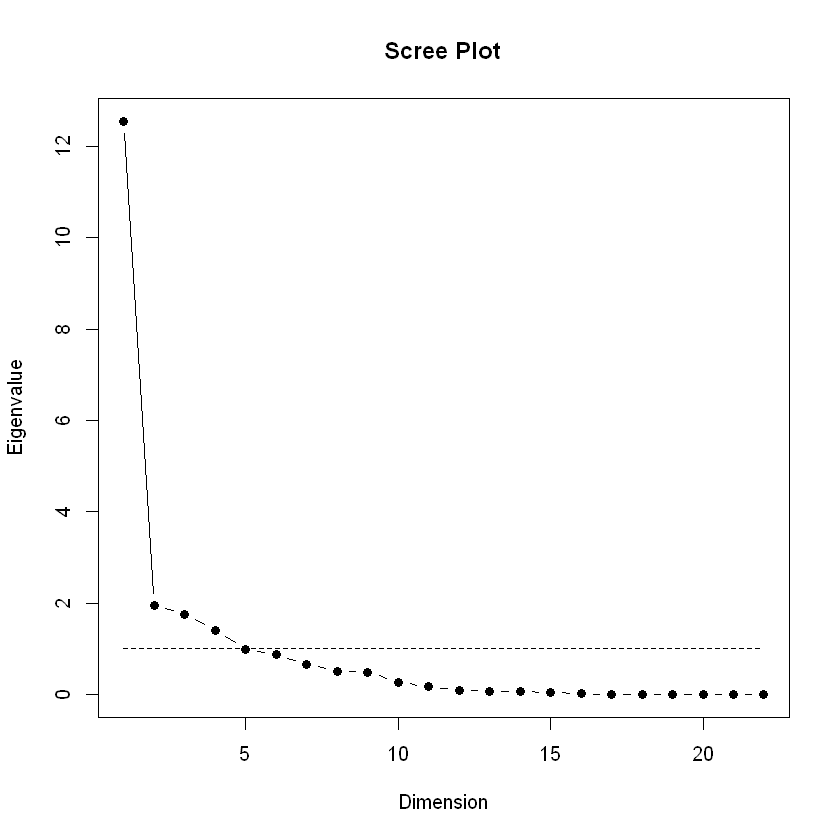

In [48]:
scree.plot(fit.two$correlation)

simple = five factors

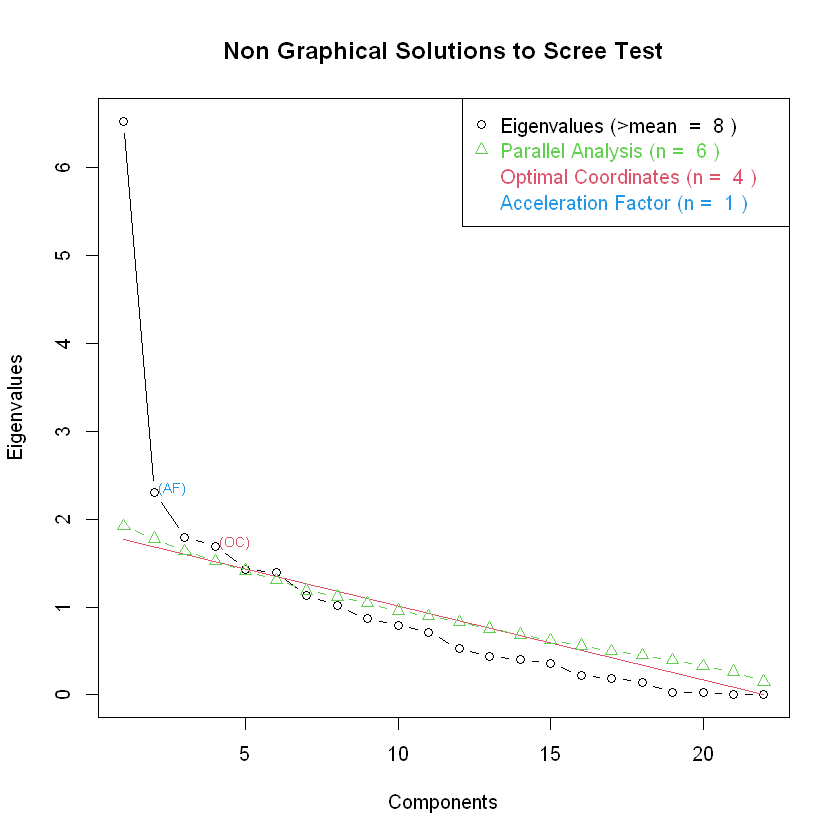

In [50]:
ev <- eigen(cor(df.wa)) # get eigenvalues
ap <- parallel(subject=nrow(df.wa),var=ncol(df.wa), rep=100, cent=.05)
nS <- nScree(x=ev$values, aparallel=ap$eigen$qevpea)
plotnScree(nS)

In [116]:
df.wa <- df.wa[,c(2:23)]

In [145]:
solution.opt <- fa(r = cor(df.wa), nfactors = 4, rotate = "oblimin", fm = "pa")

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."


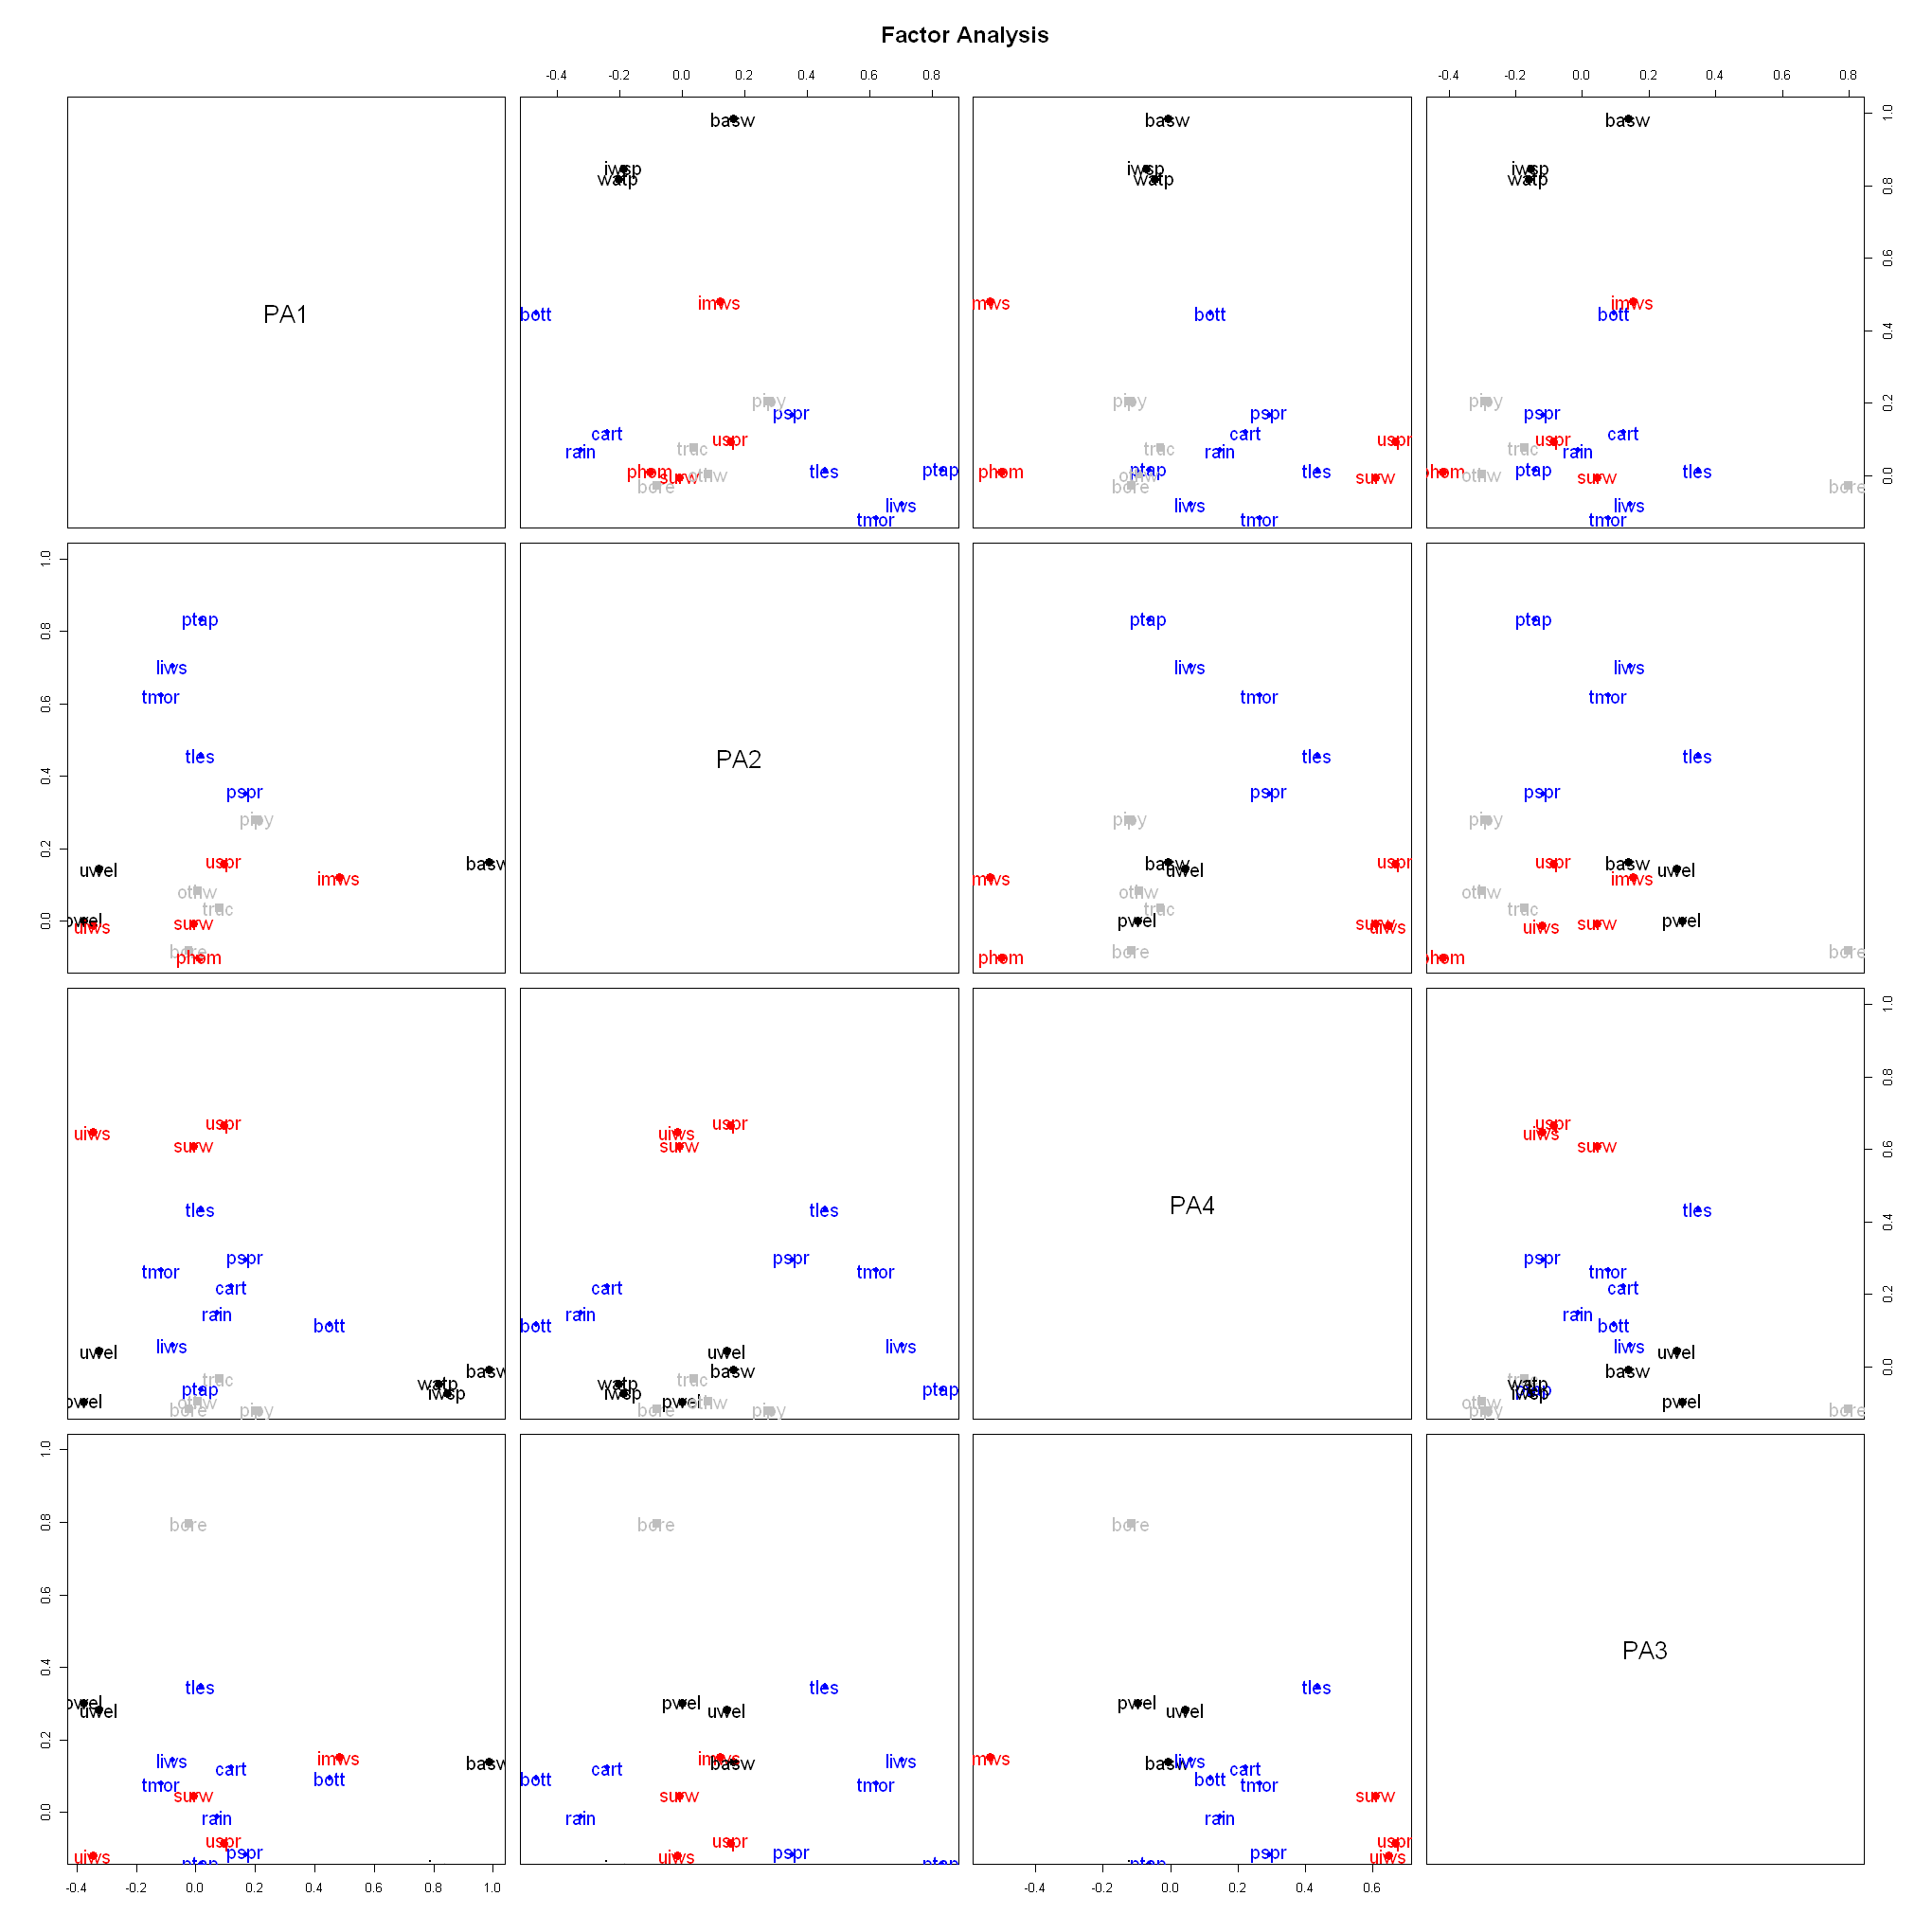

In [146]:
#options(repr.plot.width=15, repr.plot.height=15)
plot(solution.opt,labels=names(df.wa),cex=1.5, ylim=c(-.1,1)) 


In [123]:
solution

Factor Analysis using method =  pa
Call: fa(r = cor(df.wa), nfactors = 4, rotate = "oblimin", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
       PA1   PA2   PA4   PA3    h2    u2 com
ptap  0.02  0.83 -0.06 -0.14 0.609 0.391 1.1
bore -0.03 -0.08 -0.12  0.80 0.599 0.401 1.1
pspr  0.17  0.35  0.29 -0.12 0.224 0.776 2.7
uspr  0.09  0.16  0.67 -0.09 0.474 0.526 1.2
pwel -0.38  0.00 -0.10  0.30 0.221 0.779 2.1
uwel -0.33  0.14  0.04  0.28 0.289 0.711 2.4
surw -0.01 -0.01  0.61  0.04 0.379 0.621 1.0
tles  0.02  0.46  0.44  0.35 0.786 0.214 2.9
tmor -0.12  0.62  0.27  0.08 0.685 0.315 1.5
rain  0.07 -0.32  0.15 -0.01 0.103 0.897 1.5
phom  0.01 -0.10 -0.50 -0.42 0.560 0.440 2.0
imws  0.48  0.12 -0.54  0.15 0.688 0.312 2.3
pipy  0.21  0.28 -0.12 -0.29 0.162 0.838 3.2
truc  0.08  0.04 -0.03 -0.17 0.038 0.962 1.6
cart  0.12 -0.24  0.22  0.12 0.076 0.924 3.0
bott  0.45 -0.47  0.12  0.09 0.420 0.580 2.2
uiws -0.34 -0.01  0.65 -0.12 0.711 0.289 1.6
othw  0.00  0.08

# FA

The goal of this study is to analyze the characteristics of water accessibility

sources: http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/115-famd-factor-analysis-of-mixed-data-in-r-essentials/

In [94]:
str(df.wa)
df.wa <- as.numeric(df.wa[,c(2:23)])
head(df.wa, 7)


tibble [78 x 23] (S3: tbl_df/tbl/data.frame)
 $ Country: chr [1:78] "Afghanistan" "Albania" "Angola" "Armenia" ...
 $ ptap   : num [1:78] 14.2 2.4 10.3 0.5 3.5 2.7 13 5.3 0 18.4 ...
 $ bore   : num [1:78] 20.1 1.4 1.9 0.2 9.3 86.4 28.9 0 0 40.6 ...
 $ pspr   : num [1:78] 4.7 2.5 3.3 1 7.5 0 0.3 0 0 0.2 ...
 $ uspr   : num [1:78] 8.6 0.8 4.8 0.1 1.1 0.3 1.2 0 0 1.5 ...
 $ pwel   : num [1:78] 18.5 4.1 9.1 0.2 6.2 0.2 4.4 1.7 0 9 ...
 $ uwel   : num [1:78] 11.1 0.8 8.3 0 0.2 0.6 20.8 6.2 0 16.3 ...
 $ surw   : num [1:78] 7.3 0 18 0 7 1.2 5.8 5.2 0 0.8 ...
 $ tles   : num [1:78] 45.2 20.6 46.1 1.6 18.7 22.7 49.8 11.2 0 49.8 ...
 $ tmor   : num [1:78] 8.2 1.1 15.6 0.1 4.4 1.6 12.1 0.7 0 32.6 ...
 $ rain   : num [1:78] 0.4 0 1.7 0 0 0.4 0.4 0 0 0 ...
 $ phom   : num [1:78] 2.3 48.8 4.3 88.3 34 4.3 5.1 24.6 69.2 2.6 ...
 $ imws   : num [1:78] 71.2 98.4 66.9 99.9 90.6 97.8 71.7 87.3 76 80.9 ...
 $ pipy   : num [1:78] 4.8 5.2 9.7 8 19.7 3.3 4.2 54.1 3.5 9.6 ...
 $ truc   : num [1:78] 1.5 14.1 9

ERROR: Error in eval(expr, envir, enclos): 'list' object cannot be coerced to type 'double'


In [95]:
res.famd <- FAMD(df.wa, graph = FALSE)
print(res.famd)

*The results are available in the following objects:

  name          description                             
1 "$eig"        "eigenvalues and inertia"               
2 "$var"        "Results for the variables"             
3 "$ind"        "results for the individuals"           
4 "$quali.var"  "Results for the qualitative variables" 
5 "$quanti.var" "Results for the quantitative variables"


# Eigenvalues / Variances

In [96]:
eig.val <- get_eigenvalue(res.famd)
head(eig.val)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,7.525851,7.601869,7.601869
Dim.2,3.301168,3.334513,10.936382
Dim.3,2.792369,2.820575,13.756957
Dim.4,2.692574,2.719772,16.476728
Dim.5,2.431643,2.456205,18.932933


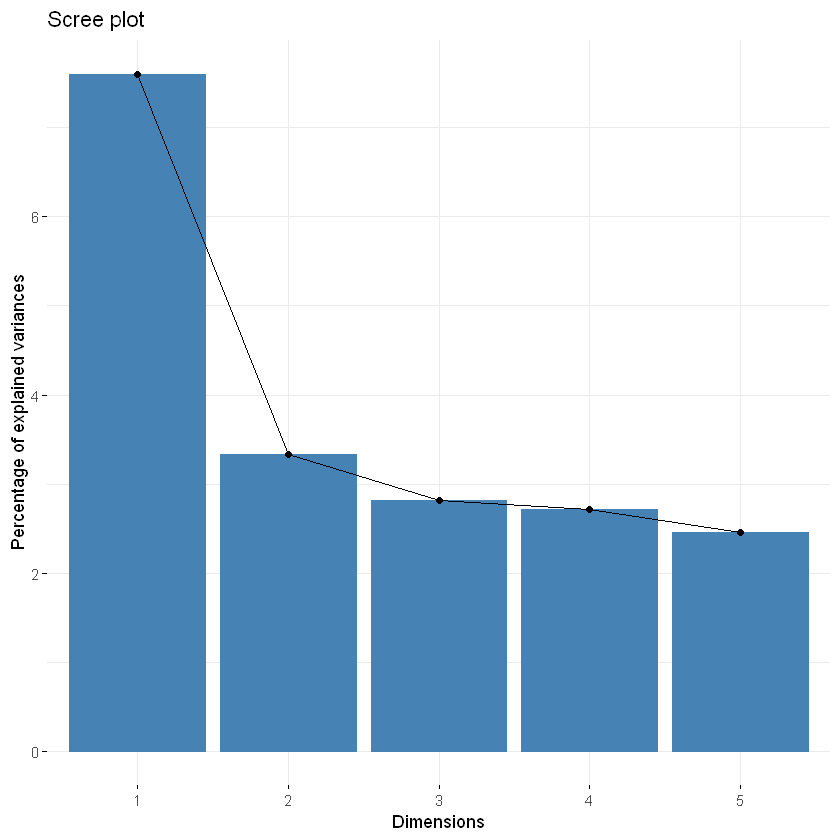

In [97]:
fviz_screeplot(res.famd)

#  All variables

In [98]:
var <- get_famd_var(res.famd)
var

FAMD results for variables 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

In [99]:
# Coordinates of variables
head(var$coord,7)
# Cos2: quality of representation on the factore map
head(var$cos2,7)
# Contributions to the  dimensions
head(var$contrib,7)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
ptap,0.21097955,0.325910358,0.04205954,0.110446953,0.0003527694
bore,0.03110368,0.053383286,0.55534158,0.004281551,0.0142737363
pspr,0.09789584,0.149244513,0.13011419,0.147484191,0.2209695921
uspr,0.28500757,0.012212543,0.13912423,0.223539102,0.0062574530
pwel,0.13367447,0.024439319,0.21266083,0.005396741,0.0018375319
uwel,0.28318344,0.001091357,0.13118957,0.044051893,0.0831197244
surw,0.26495755,0.003377508,0.04099495,0.071027736,0.2599051632


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
ptap,0.044512372,1.062176e-01,0.001769005,1.219853e-02,1.244463e-07
bore,0.000967439,2.849775e-03,0.308404275,1.833168e-05,2.037395e-04
pspr,0.009583595,2.227392e-02,0.016929703,2.175159e-02,4.882756e-02
uspr,0.081229317,1.491462e-04,0.019355552,4.996973e-02,3.915572e-05
pwel,0.017868865,5.972803e-04,0.045224630,2.912482e-05,3.376524e-06
uwel,0.080192858,1.191059e-06,0.017210703,1.940569e-03,6.908889e-03
surw,0.070202503,1.140756e-05,0.001680586,5.044939e-03,6.755069e-02


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
ptap,2.8033981,9.87257723,1.506232,4.1019099,0.01450745
bore,0.4132912,1.61710300,19.887831,0.1590133,0.58699978
pspr,1.3007943,4.52096090,4.659635,5.4774428,9.08725649
uspr,3.7870480,0.36994614,4.982302,8.3020603,0.25733441
pwel,1.7762042,0.74032341,7.615786,0.2004306,0.07556752
uwel,3.7628097,0.03305971,4.698146,1.6360515,3.41825428
surw,3.5206326,0.10231251,1.468107,2.6379123,10.68846106


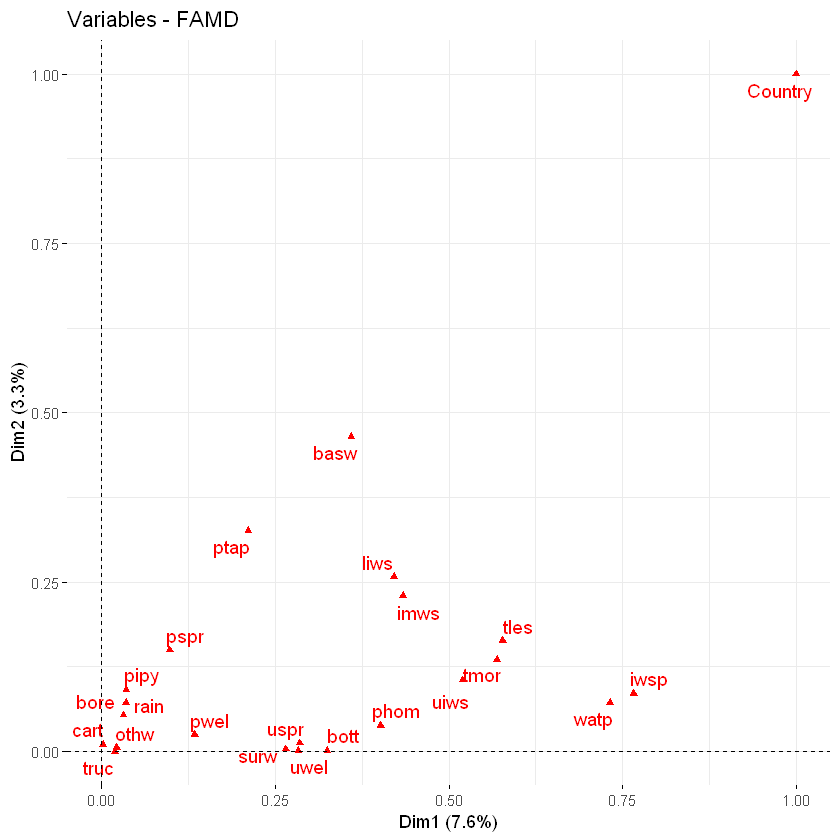

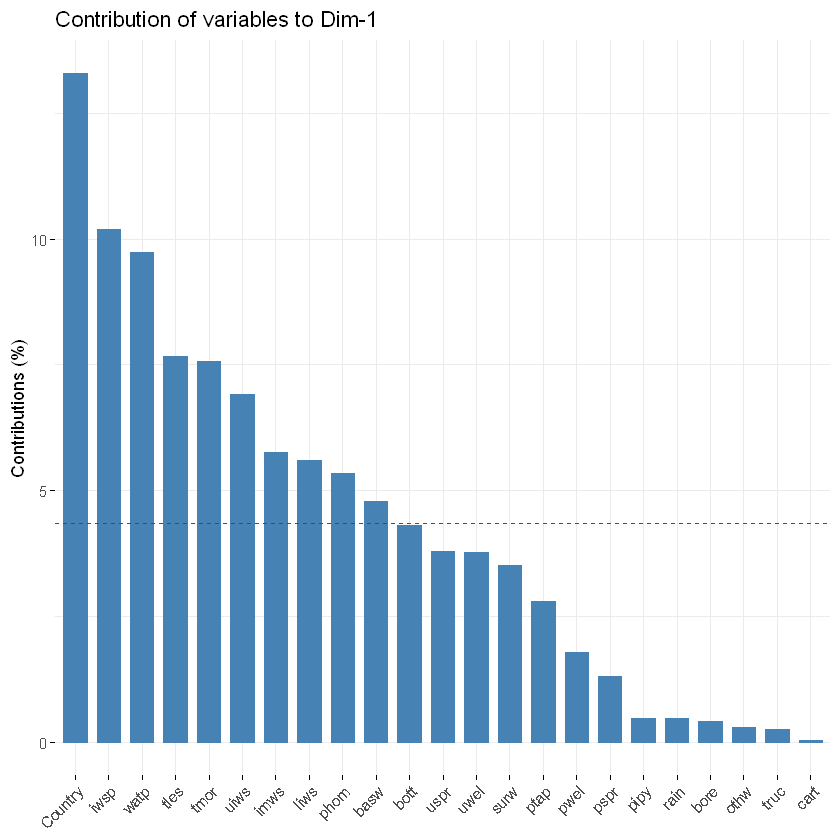

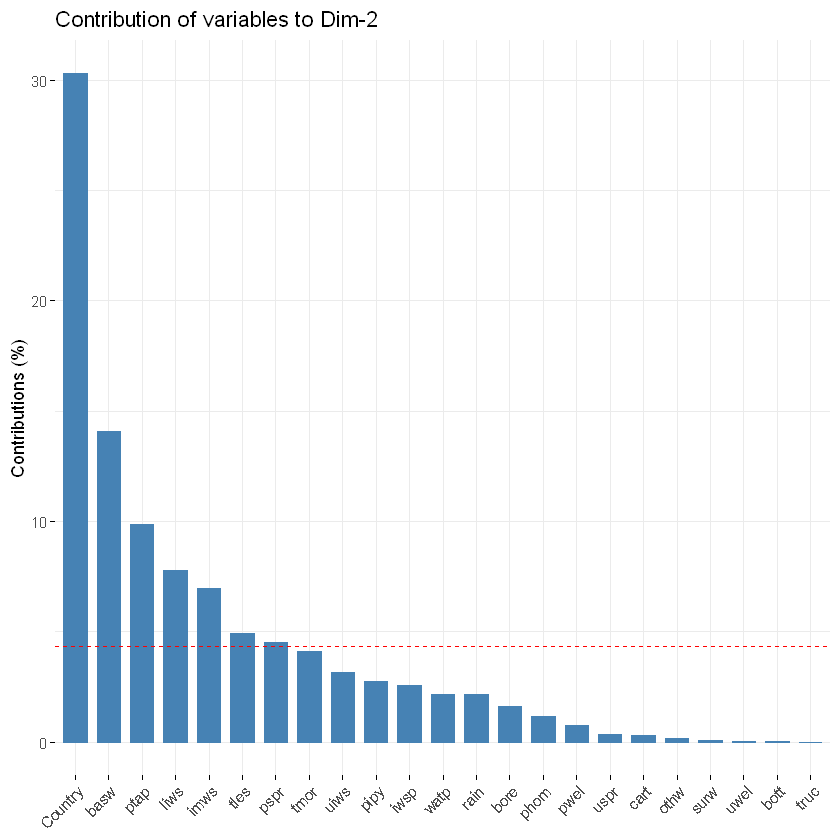

In [100]:
# Plot of variables
fviz_famd_var(res.famd, repel = TRUE)
# Contribution to the first dimension
fviz_contrib(res.famd, "var", axes = 1)
# Contribution to the second dimension
fviz_contrib(res.famd, "var", axes = 2)

The red dashed line on the graph above indicates the expected average value, If the contributions were uniform.

From the plots above, it can be seen that:

variables that contribute the most to the first dimension are: iwsp and watp.

variables that contribute the most to the second dimension are: basw and ptap.

# Quantitative variables

In [101]:
quanti.var <- get_famd_var(res.famd, "quanti.var")
quanti.var 

FAMD results for quantitative variables 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

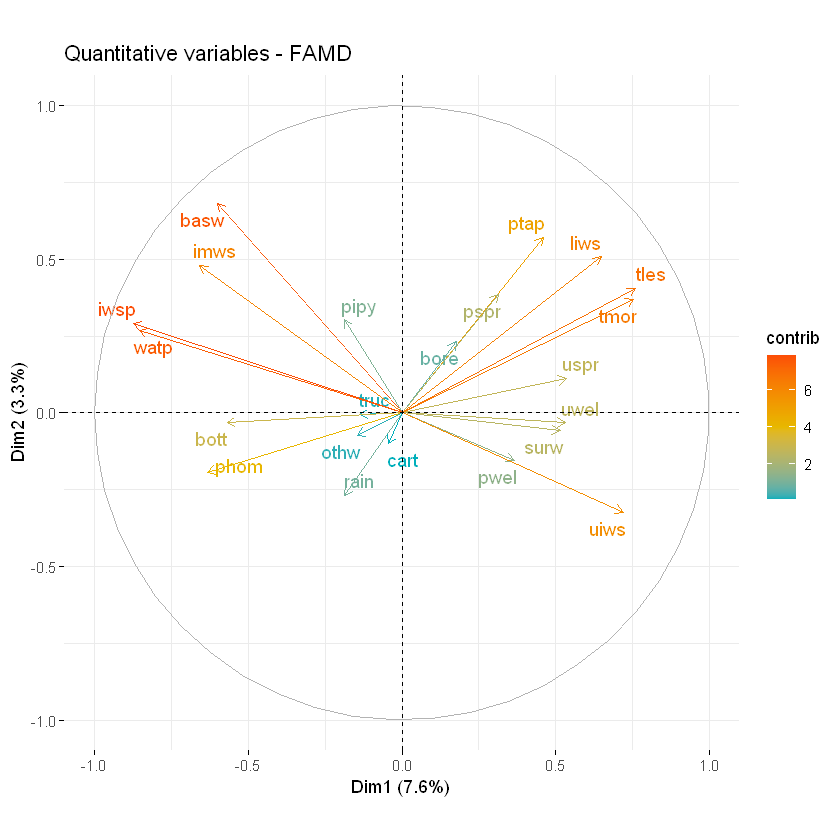

In [102]:
fviz_famd_var(res.famd, "quanti.var", col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

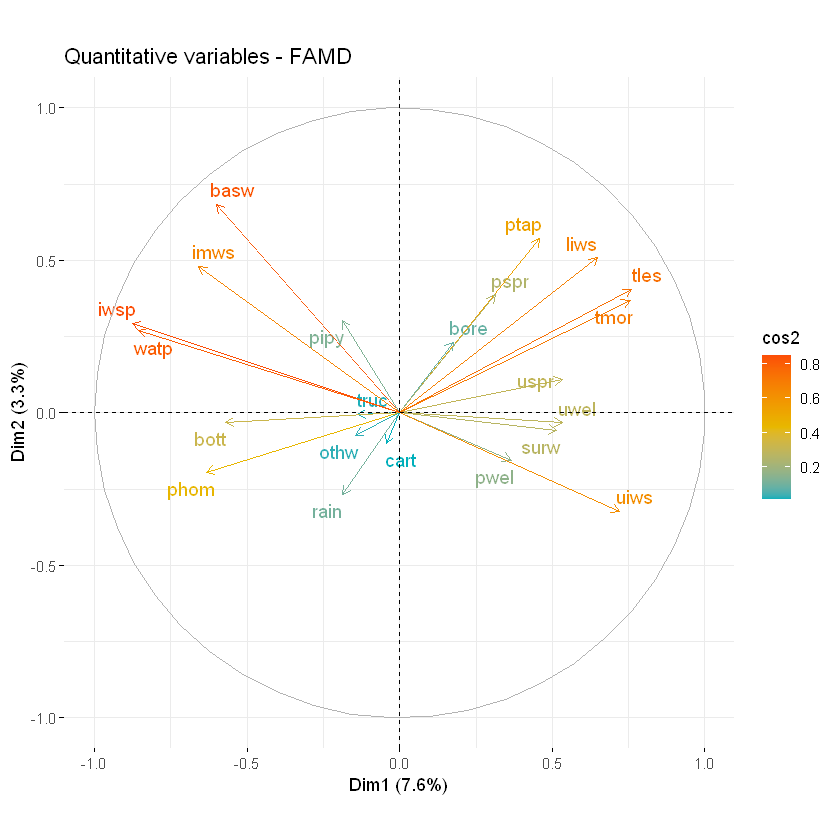

In [103]:
# Color by cos2 values: quality on the factor map
fviz_famd_var(res.famd, "quanti.var", col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE)

# Graph of qualitative variables

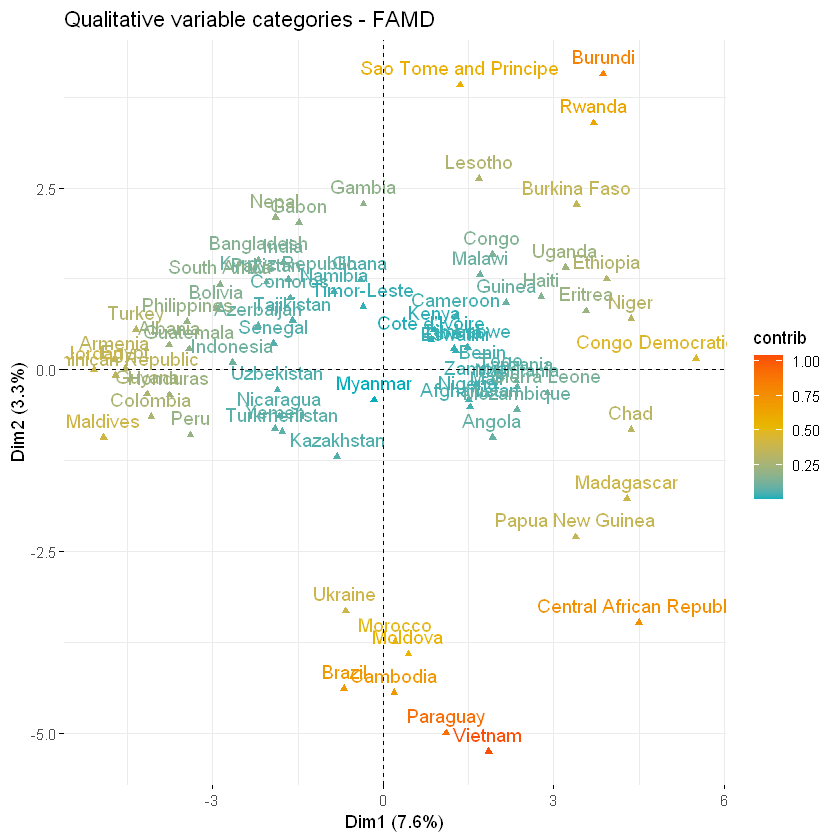

In [104]:
fviz_famd_var(res.famd, "quali.var", col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

# Graph of individuals

In [105]:
ind <- get_famd_ind(res.famd)
ind

FAMD results for individuals 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

Warning message:
"ggrepel: 20 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


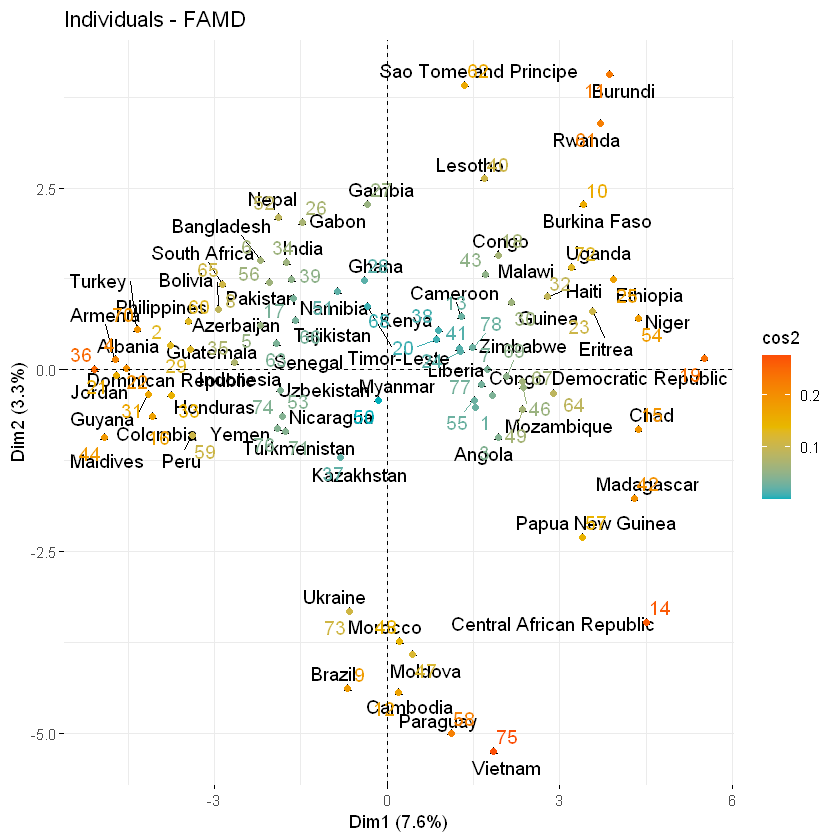

In [108]:
fviz_famd_ind(res.famd, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

The factor analysis of mixed data (FAMD) makes it possible to analyze a data set, in which individuals are described by both qualitative and quantitative variables.

In [113]:
result <- PCA(df.wa[,(2:23)])
result

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 78 individuals, described by 22 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o